In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from eff.util.util import load_results
from eff.analysis import surprisal, test_statistics
from eff.analysis.plotting import set_lang_ax

np.random.seed(0)

In [3]:
base_path = Path("./out/wikt_unique")
dataset, res, criterion, model = load_results(base_path)

In [4]:
ignore_vowel_index=0

fin {'V': (2.68, 2.63, 0.61), 'C': (2.64, 2.64, 0.7), 'E': (2.38, 2.29, 0.76), 'ttest': (0.015174183737232973, 3.811879046995552e-55, 1.641926364673089e-32)}
tur {'V': (2.83, 2.79, 0.47), 'C': (2.92, 2.85, 0.46), 'E': (2.95, 2.89, 0.46), 'ttest': (3.155550930204839e-11, 4.554046616315458e-20, 0.02203765604655646)}
hye {'V': (2.44, 2.37, 0.81), 'C': (2.83, 2.8, 0.51), 'E': (2.48, 2.33, 0.88), 'ttest': (6.019267147788397e-95, 0.07608088883690545, 1.0989550641446964e-49)}
arb {'V': (2.75, 2.73, 0.34), 'C': (2.32, 2.27, 0.43), 'E': (2.18, 2.11, 0.46), 'ttest': (4.732839509346981e-239, 0.0, 8.991818782219862e-21)}


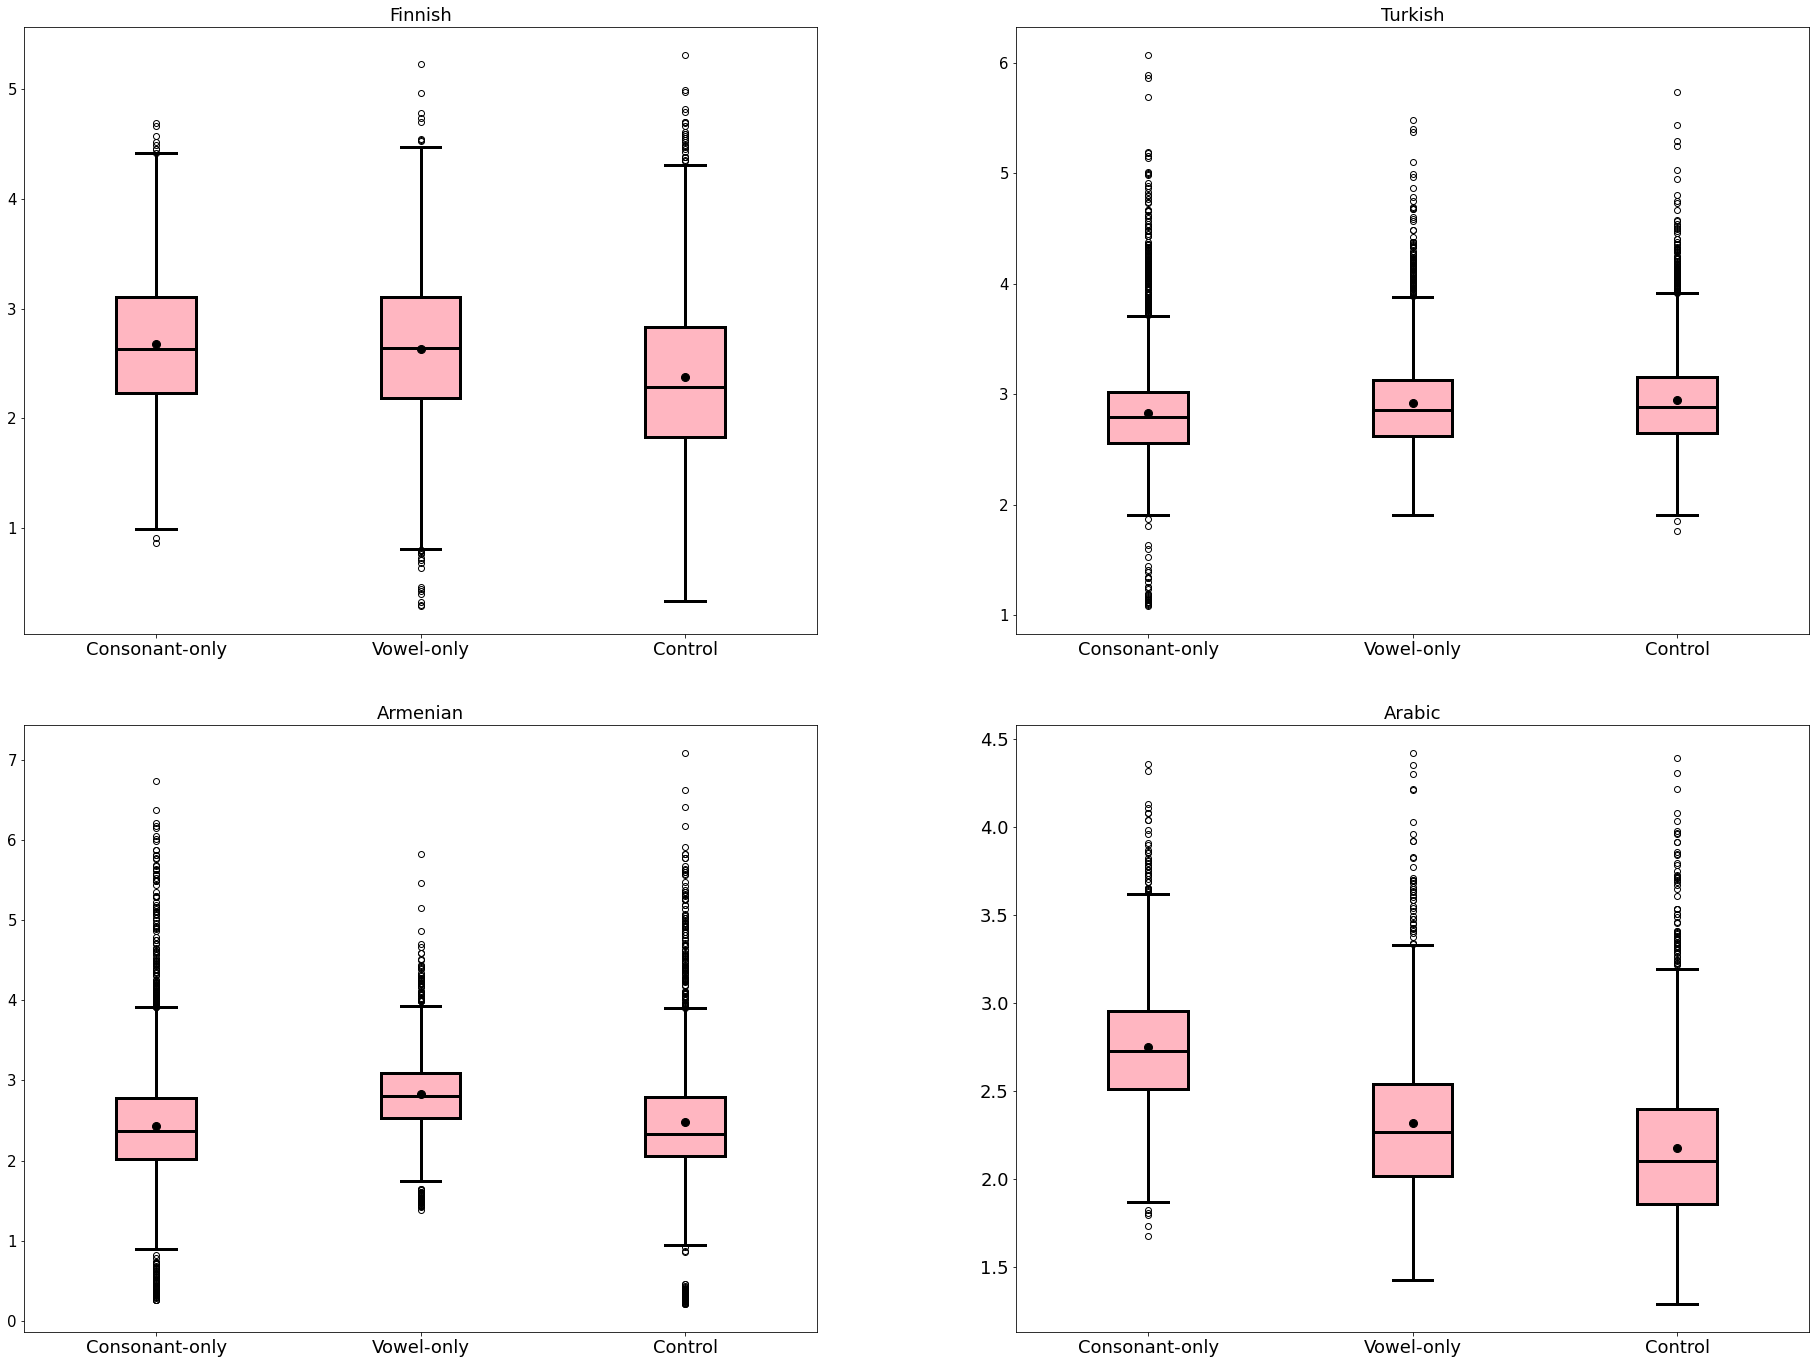

In [6]:

# fig = plt.figure(figsize=(20, 40))
fig = plt.figure(figsize=(32, 24))
gs = fig.add_gridspec(2, 2, hspace=0.15, wspace=0.25)
(ax_fin, ax_tur), (ax_hye, ax_arb) = gs.subplots()

lang2ax = dict(
    fin=ax_fin, tur=ax_tur,
    hye=ax_hye, arb=ax_arb
)

id2name = dict(
    fin="Finnish", tur="Turkish",
    hye="Armenian", arb="Arabic"
)

for lang_id in res:
    ax = lang2ax[lang_id]
    # alphabet, bipa = dataset[lang_id]['clts'].output_alphabet, dataset[lang_id]['clts'].bipa
    surprisal_vowel = surprisal(
                        res[lang_id]['vowel_masking']['logprobs'],
                        res[lang_id]['vowel_masking']['targets'],
                        res[lang_id]['vowel_masking']['indices'],
                        ignore_vowel_index=999  
                        )
    surprisal_consonant = surprisal(
                            res[lang_id]['consonant_masking']['logprobs'],
                            res[lang_id]['consonant_masking']['targets'],
                            res[lang_id]['consonant_masking']['indices'],
                            ignore_vowel_index=ignore_vowel_index
                            )
    surprisal_none = surprisal(
                        res[lang_id]['unmasked']['logprobs'],
                        res[lang_id]['unmasked']['targets'],
                        res[lang_id]['unmasked']['indices'],
                        ignore_vowel_index=ignore_vowel_index
                        )
    data = [surprisal_vowel, surprisal_consonant, surprisal_none]
    xlabels = ["Consonant-only", "Vowel-only", "Control"]

    set_lang_ax(ax, data, xlabels,
        title=id2name[lang_id],
        boxcolor='lightpink',
        fontsize=18
    )

    stats = test_statistics(dict(
        V=surprisal_vowel,
        C=surprisal_consonant,
        E=surprisal_none
    ))
    print(lang_id, stats)

plt.savefig("../img/surprisal_VCE_wikt.png",
            bbox_inches='tight',
            pad_inches=0,
            format='png',
            dpi=300)

plt.show()
